In [2257]:
import numpy as np
import matplotlib.pyplot as plt

In [2258]:
p1 = np.random.uniform(low=0.1, high=0.5, size =1)
p2 = np.random.uniform(low=0.1, high=0.5, size =1)
p3 = np.random.uniform(low=0.1, high=0.25, size =1)
p4 = np.random.uniform(low=0.1, high=0.25, size =1)
p5 = np.random.uniform(low=0.5, high=1.5, size =1)

1.0210539071807965


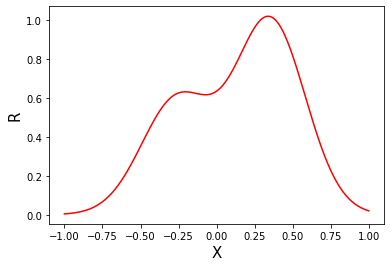

In [2259]:
def unknown_reward_function(x, noise = 0):
    r = (p5*np.exp(-np.power(x+p1, 2. )/(2* np.power(p3, 2.)))+np.exp(-np.power(x-p2, 2.)/(2*np.power(p4, 2.)))) 
    return r+(noise * (np.random.random()-0.5)/10.)

x = np.linspace(-1,1,200)

y = unknown_reward_function(x,0) 
plt.xlabel('X',size = 15)
plt.ylabel( 'R', size = 15) 
plt.plot(x, y, color= 'red' )

y_max = max(y)

print (y_max)

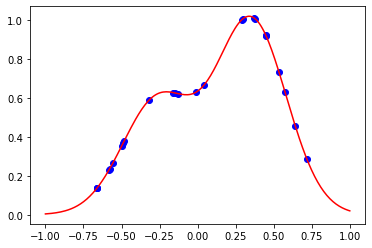

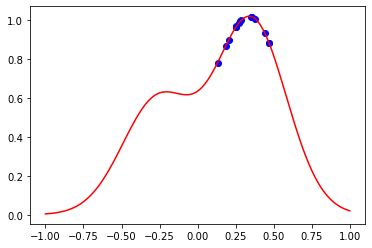

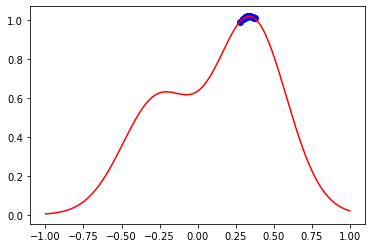

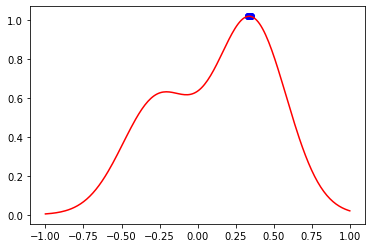

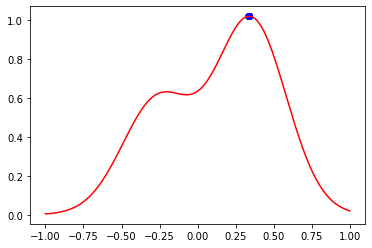

In [2260]:
var = 0.5
sampleNum = 25
sampleSet = np.random.uniform(low=-0.75, high=0.75, size=sampleNum)
values = unknown_reward_function(sampleSet,0)
sampleNum = 15

trialNum = 0

while True:
        
    # Plot Graph
    plt.scatter(sampleSet,values, color='blue')
    plt.plot(x, y, color= 'red' )
    plt.show()
    
    # Exit Condition
    miV = 2
    miI = 0
    maI = 0
    maV = -2
    for i in range(len(sampleSet)):
        val = sampleSet[i]
        if val < miV:
            miV = val
            miI = i
        if val > maV:
            maV = val
            maI = i
    if sampleSet[maI]-sampleSet[miI] < 0.01:
        #print("Founded max",values[0])
        #print("Real max", y_max)
        #print("Difference: ", abs(values[0]-y_max))
        break
    
    
    # Determining new generation
    ls = []
    for number in range(len(sampleSet)):
        if len(ls) == 5 and values[ls[0]] > values[number]:
            continue
        count = 0
        while True:
            if count == len(ls):
                ls.append(number)
                if len(ls) == 6:
                    ls.pop(0)
                break
            elif values[ls[count]] <= values[number]:
                count += 1
            else:
                ls.insert(count,number)
                if len(ls) == 6:
                    ls.pop(0)
                break
    
    # Controls for nex-Gen
    #print(sampleSet,values)
    #print([sampleSet[x] for x in ls],[values[x] for x in ls])
    
    
    # Variance Determining
    
    varX = np.var([sampleSet[x] for x in ls])
    if varX < 0.012:
        var /= 4.2
        sampleSet = np.random.normal(np.mean([sampleSet[x] for x in ls]),var,sampleNum)
        values = unknown_reward_function(sampleSet,0)
    else:
        var /= 1.75
        sampleSet = np.random.normal(sampleSet[ls[4]],var,sampleNum)
        values = unknown_reward_function(sampleSet,0)
        
    